In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
with open('../data/ultimate_data_challenge.json') as user_file:
  file_contents = user_file.read()
retention = json.loads(file_contents)
df = pd.DataFrame(retention)
print(df.shape)
df.head()

(50000, 12)


,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
df['last_trip_date'].max()

'2014-07-01'

In [5]:
df['active'] = df['last_trip_date'] > '2014-06-01'
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [6]:
df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
active                       0
dtype: int64

Missing values from avg rating of driver, phone, and avg_rating_by_driver.

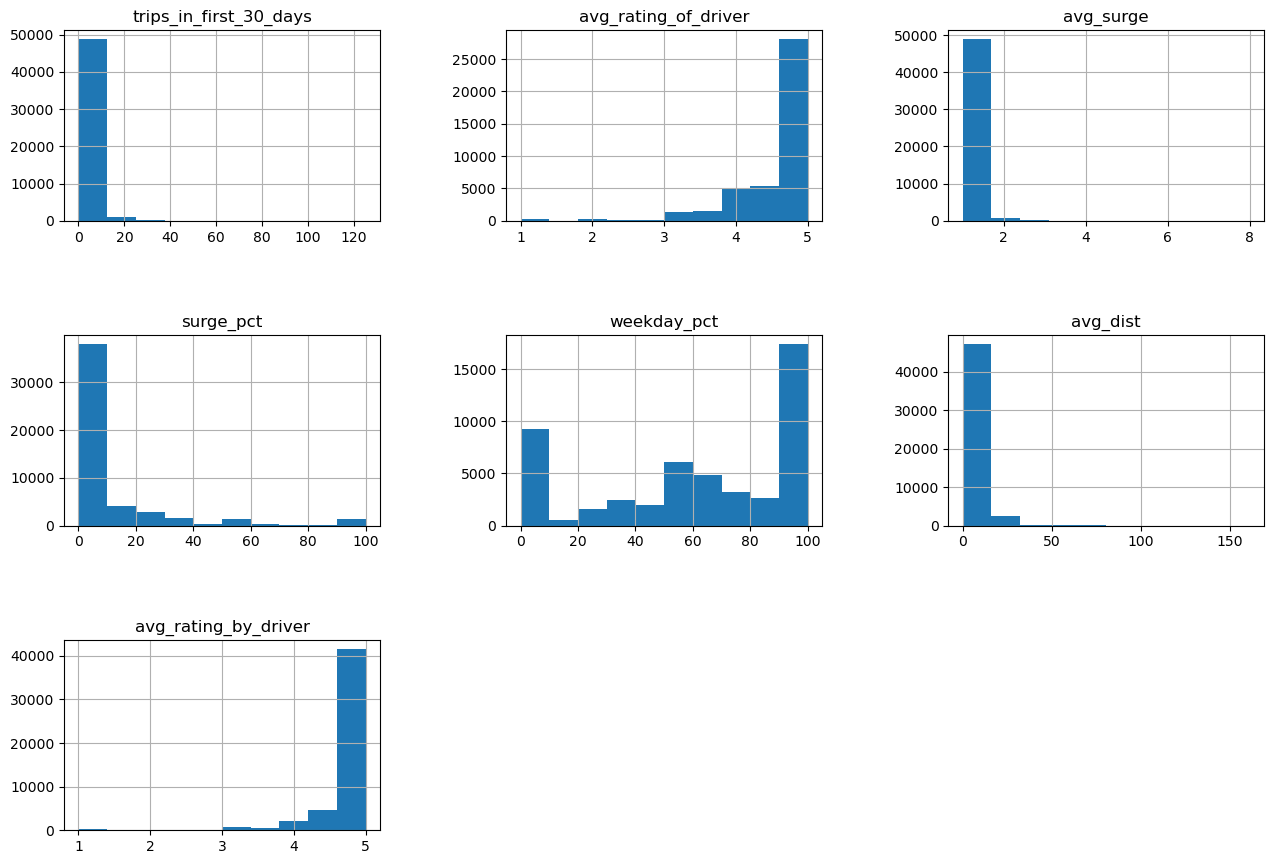

In [7]:
df.hist(figsize=(15,10))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.6);

In [8]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [9]:
counts = df.value_counts('active')
percent_inactive = counts[0] / (counts.sum())*100
print(f"Percent inactive: {percent_inactive}%")

Percent inactive: 63.38%


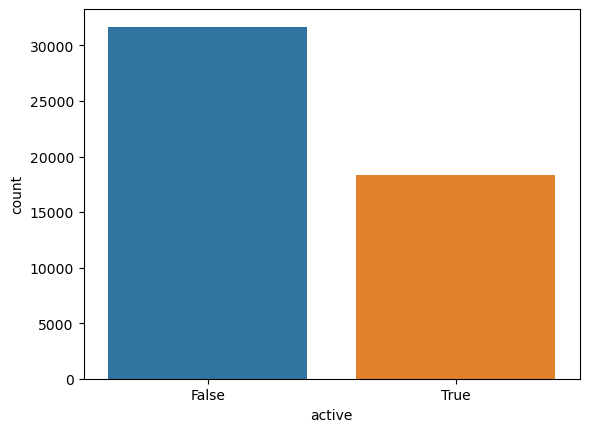

In [10]:
sns.countplot(data=df, x='active');

In [11]:
df.select_dtypes('object')

,city,signup_date,last_trip_date,phone
0,King's Landing,2014-01-25,2014-06-17,iPhone
1,Astapor,2014-01-29,2014-05-05,Android
2,Astapor,2014-01-06,2014-01-07,iPhone
3,King's Landing,2014-01-10,2014-06-29,iPhone
4,Winterfell,2014-01-27,2014-03-15,Android
...,...,...,...,...
49995,King's Landing,2014-01-25,2014-06-05,iPhone
49996,Astapor,2014-01-24,2014-01-25,iPhone
49997,Winterfell,2014-01-31,2014-05-22,Android
49998,Astapor,2014-01-14,2014-01-15,iPhone


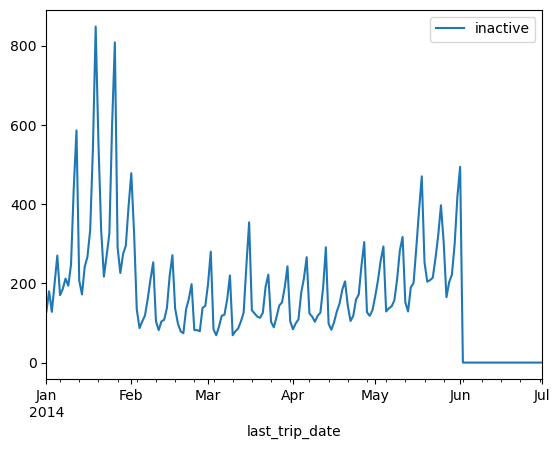

In [12]:
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['inactive'] = df['active']*-1 + 1
last_trips = df.groupby('last_trip_date')[['inactive']].sum()
last_trips.plot();
df.drop(columns=['inactive'], inplace=True)

In [13]:
df['active'].sum() / len(df) * 100

36.620000000000005

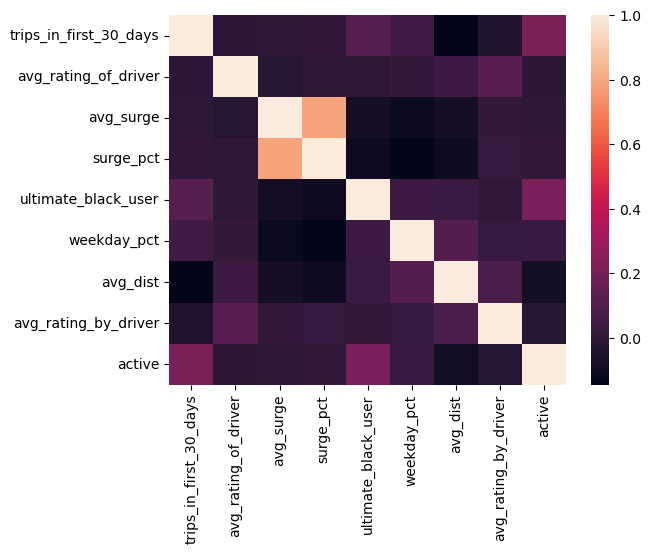

In [14]:
sns.heatmap(df.corr());

Ultimate black users and trips in first 30 days appear to be highest predictors

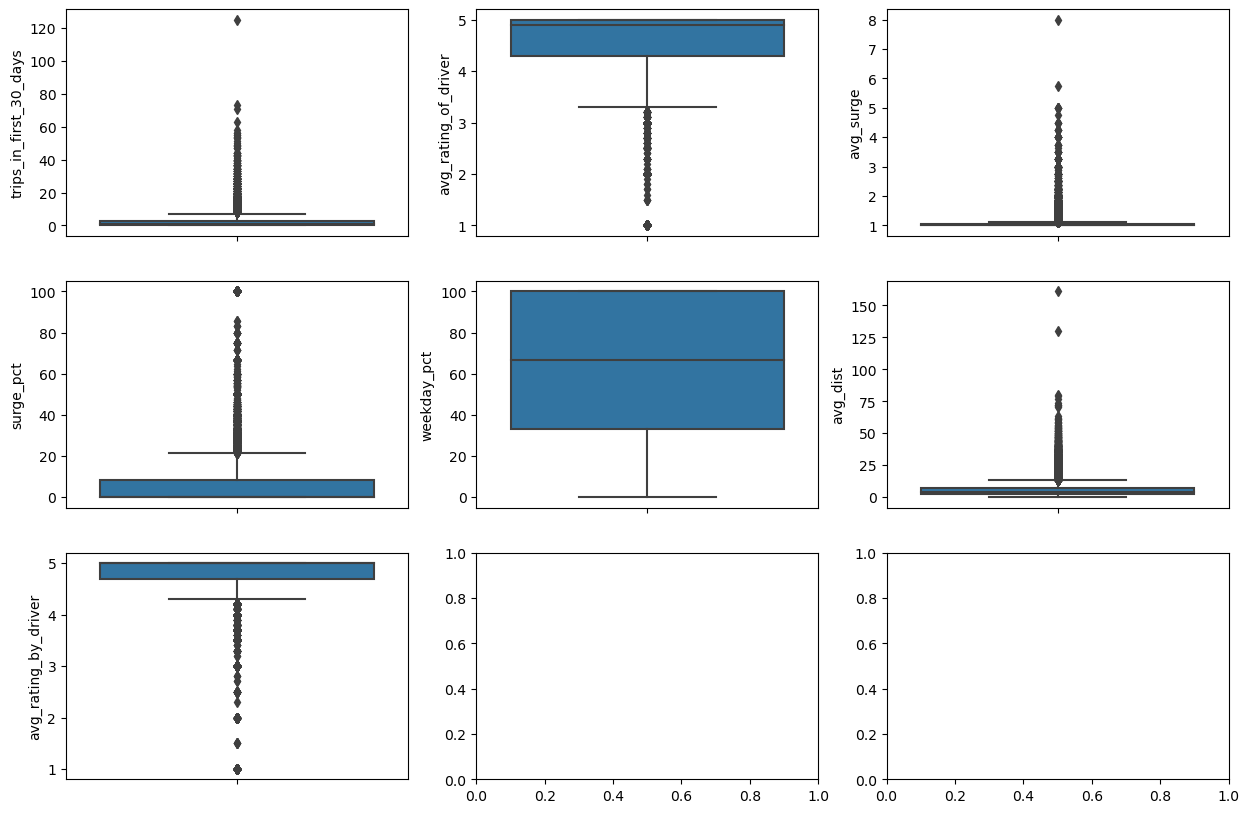

In [15]:
num_cols=df.select_dtypes('int').columns.to_list()
num_cols.extend(df.select_dtypes('float').columns.to_list())
fig, axes = plt.subplots(3,3, figsize=(15,10))
for col, ax in zip(num_cols, axes.flat):
    sns.boxplot(ax = ax, data=df, y=col);

trips_in_first_30_days:
Active median: 2.0   Inactive median: 1.0

avg_rating_of_driver:
Active median: 4.8   Inactive median: 5.0

avg_surge:
Active median: 1.0   Inactive median: 1.0

surge_pct:
Active median: 0.0   Inactive median: 0.0

weekday_pct:
Active median: 65.2   Inactive median: 66.7

avg_dist:
Active median: 3.73   Inactive median: 4.03

avg_rating_by_driver:
Active median: 4.8   Inactive median: 5.0



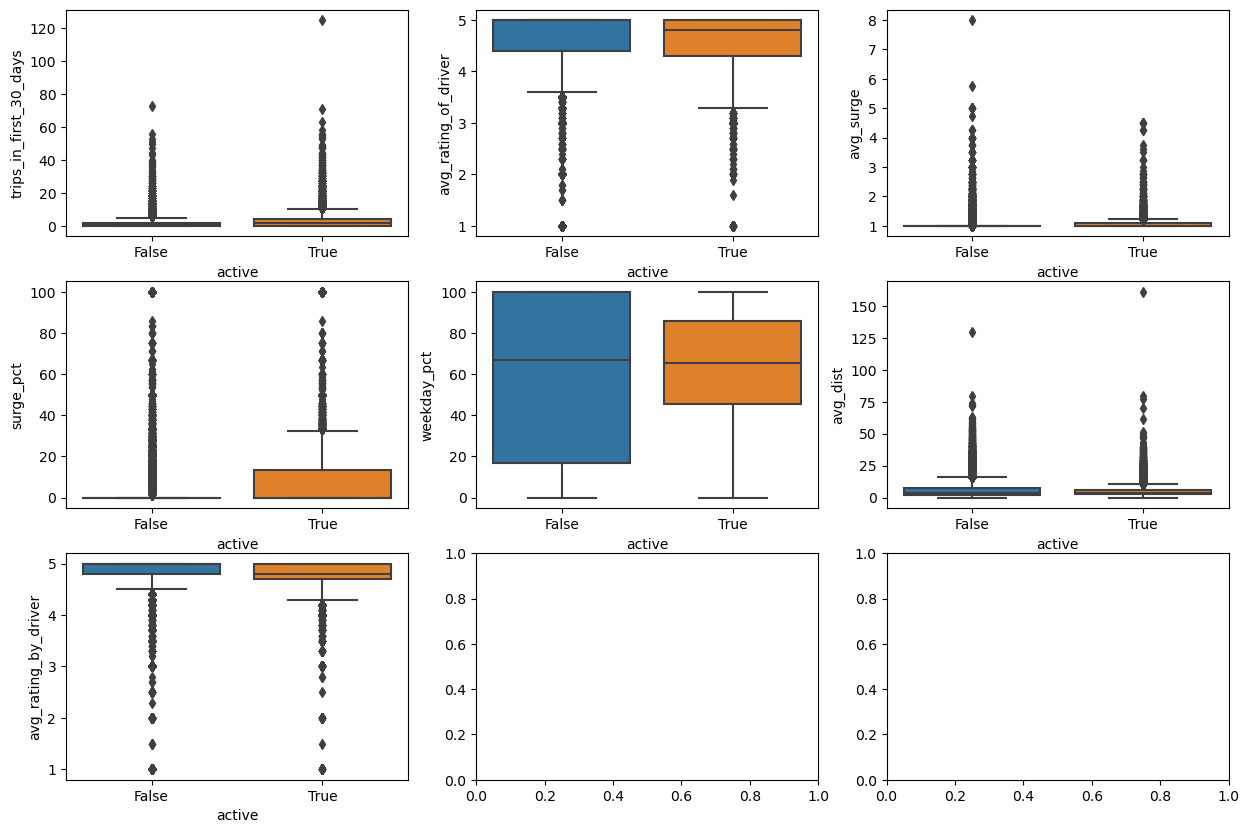

In [16]:
fig, axes = plt.subplots(3,3, figsize=(15,10))
for col, ax in zip(num_cols, axes.flat):
    sns.boxplot(ax = ax, data=df, x='active', y=col);
    median_active = df[df['active']==True][col].median()
    median_inactive = df[df['active']==False][col].median()
    print(f'{col}:\nActive median: {median_active}   Inactive median: {median_inactive}\n')

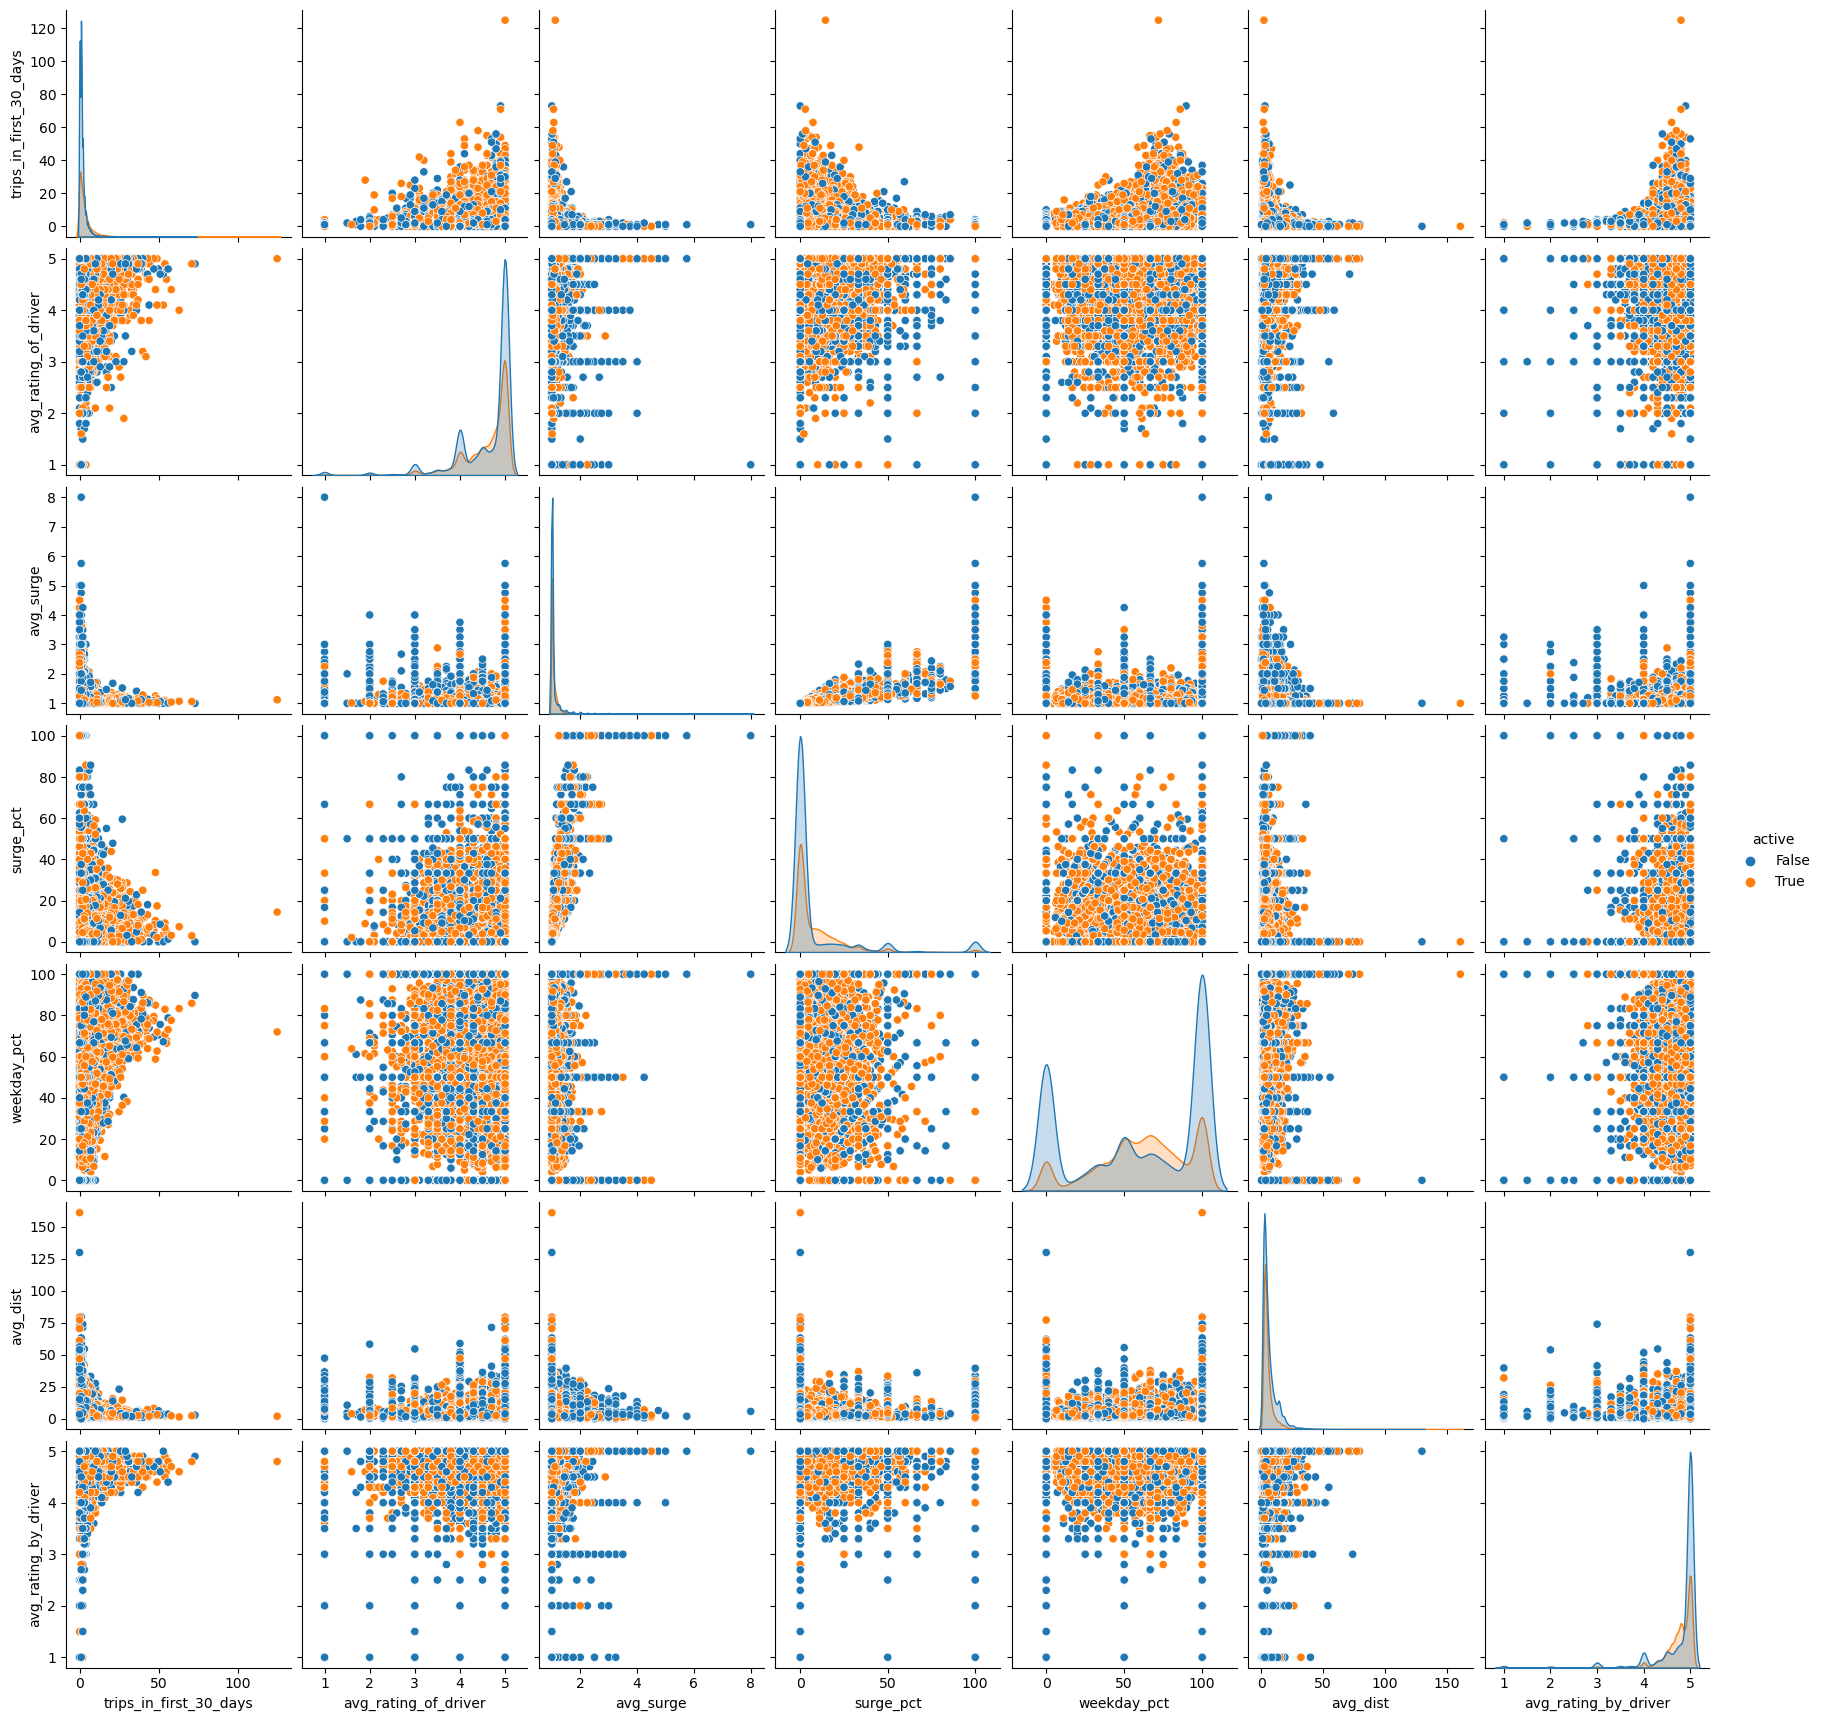

In [17]:
sns.pairplot(data=df, hue='active', vars=num_cols);

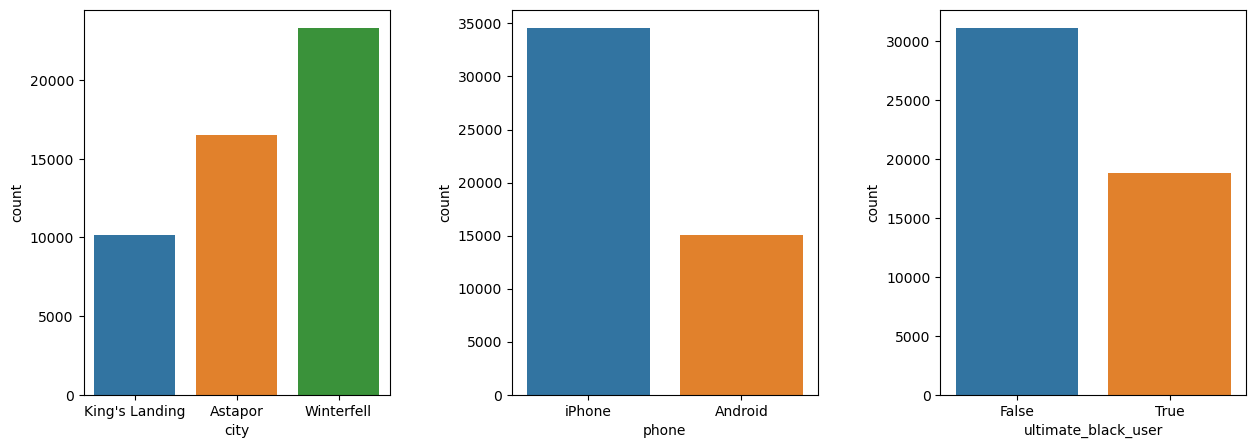

In [18]:
cat_cols=df.select_dtypes('object').columns.to_list()
cat_cols.extend(df.select_dtypes('bool').columns.to_list())
cat_cols.remove('signup_date')
cat_cols.remove('active')
fig, axes = plt.subplots(1,3, figsize=(15,5))
for col, ax in zip(cat_cols, axes.flat):
    sns.countplot(ax=ax, data=df, x=col)
plt.subplots_adjust(wspace=0.4);

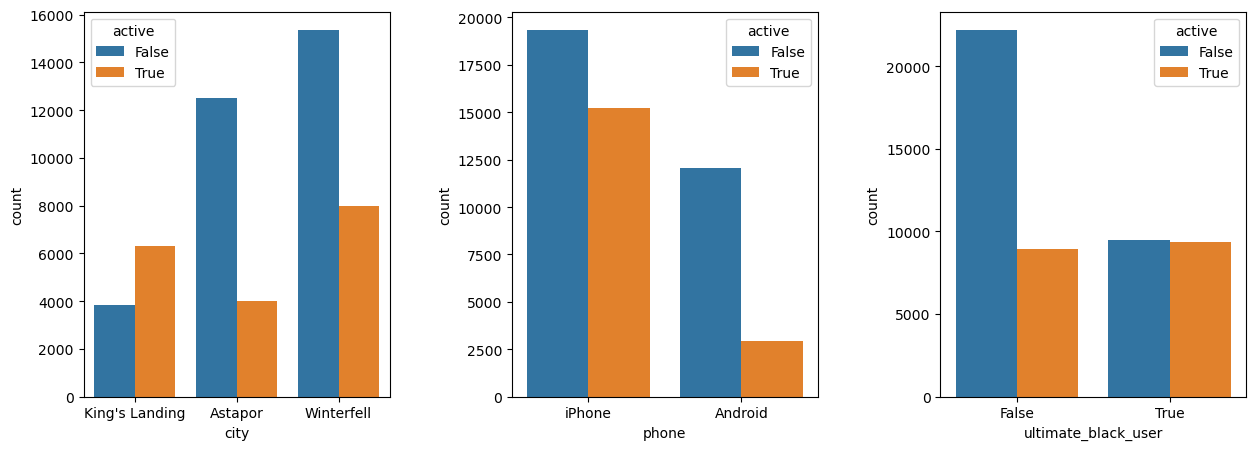

In [19]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
for col, ax in zip(cat_cols, axes.flat):
    sns.countplot(ax=ax, data=df, x=col, hue='active')
    plt.subplots_adjust(wspace=0.4);

In [20]:
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, GridSearchCV, learning_curve, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from io import StringIO  
from IPython.display import Image  
import pydotplus

In [21]:
X = df.drop(columns=['signup_date', 'last_trip_date','active'])
y = df['active']

In [22]:
X = pd.get_dummies(X, drop_first=True)
X['ultimate_black_user'] = X['ultimate_black_user'].astype(int)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=426)

In [24]:
X_defaults_median = X_train.median()
X_train = X_train.fillna(X_defaults_median)
X_test = X_test.fillna(X_defaults_median)

## Initial Modeling

In [25]:
tree_model = DecisionTreeClassifier(criterion='gini')
rf_model = RandomForestClassifier(criterion='gini', n_jobs=-1)
lr_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LogisticRegression())

models = [tree_model, rf_model, lr_pipe]
names = ['Decision Tree','Random Forest', 'Logistic Regression']

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=22)

Initial Decision Tree f1 score: 0.6000413089652922
Initial Random Forest f1 score: 0.6686679584073407
Initial Logistic Regression f1 score: 0.5689476472406323


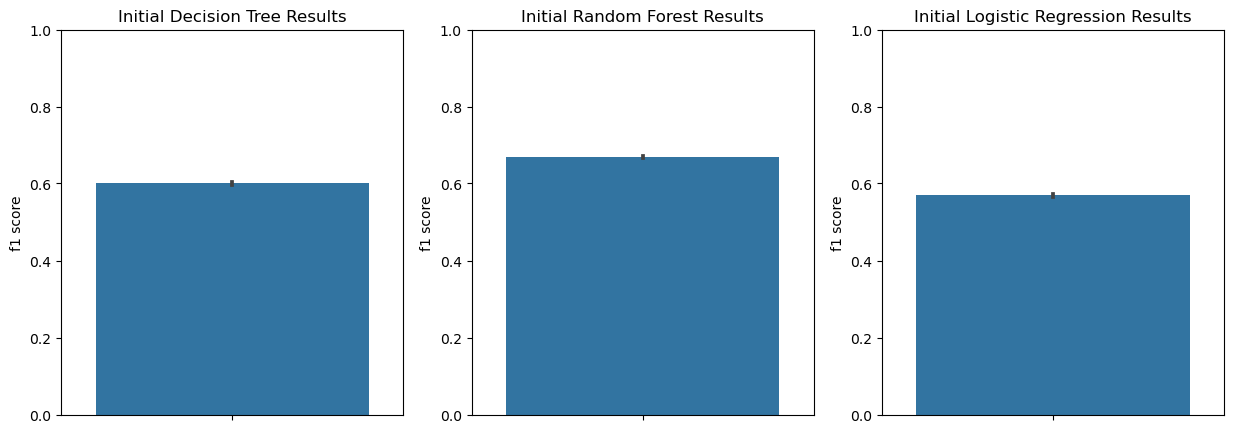

In [26]:
fig, axes = plt.subplots(1,3, figsize=(15,5))
for model, name, ax in zip(models, names, axes):
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring = 'f1', n_jobs=-1)
    sns.barplot(ax=ax, data=cv_results, y='test_score')
    ax.set_title(f'Initial {name} Results')
    ax.set_ylabel('f1 score')
    ax.set_ylim(0,1)
    print(f"Initial {name} f1 score: {cv_results['test_score'].mean()}");

In [27]:
tree_model_vis = DecisionTreeClassifier(criterion='gini', max_depth=3)
cv_results = cross_validate(tree_model_vis, X_train, y_train, cv=cv, scoring = 'f1', n_jobs=-1, return_estimator=True)

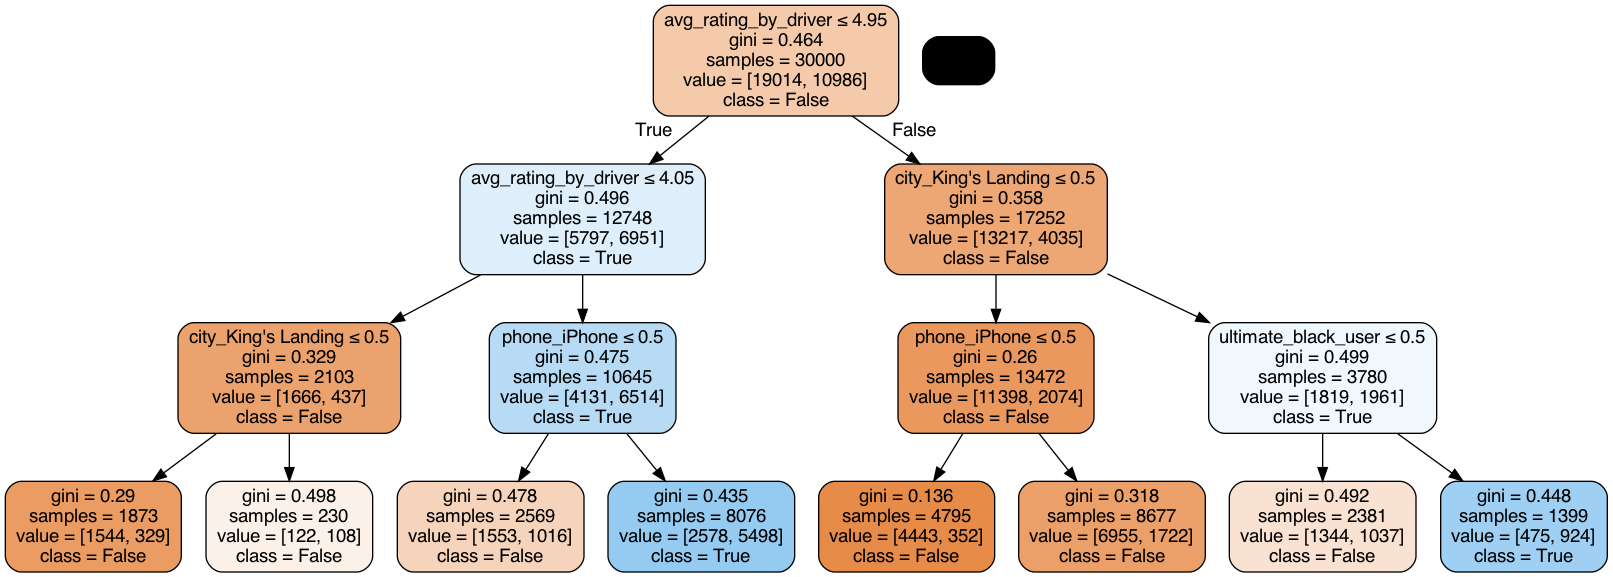

In [28]:
dot_data = StringIO()

export_graphviz(cv_results['estimator'][0], out_file=dot_data, filled=True, rounded=True,
                    special_characters=True, feature_names = X_train.columns, class_names=['False','True'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
max_depths = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depths.extend([3,5,7])
random_grid_tree ={'max_features': ['sqrt', 'log2'],
             'max_depth': max_depths,
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

In [30]:
tree_model = DecisionTreeClassifier(random_state=44)
tree_random = RandomizedSearchCV(estimator=tree_model, param_distributions=random_grid_tree,
                              n_iter=60, scoring='f1', n_jobs=-1, cv=cv, random_state=50)

In [31]:
tree_result = tree_random.fit(X_train, y_train)
tree_best = tree_result.best_estimator_
print(f'Best score: {tree_result.best_score_}')
print(f'Best parameters: {tree_result.best_params_}')

Best score: 0.6713043335726765
Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}


In [32]:
random_grid_rf = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
             'criterion': ['gini', 'entropy'],
             'max_features': ['sqrt', 'log2'],
             'max_depth': [int(x) for x in np.linspace(10, 100, num = 10)],
             'min_samples_split': [2, 5, 10],
             'min_samples_leaf': [1, 2, 4]}

In [33]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=31)
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid_rf,
                              n_iter=60, scoring='f1', n_jobs=-1, cv=cv, random_state=50)

In [34]:
rf_result = rf_random.fit(X_train, y_train)
rf_best = rf_result.best_estimator_
print(f'Best score: {rf_result.best_score_}')
print(f'Best parameters: {rf_result.best_params_}')

Best score: 0.6935410533404263
Best parameters: {'n_estimators': 1800, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 90, 'criterion': 'entropy'}


In [35]:
from scipy.stats import loguniform

grid_lr = {'logisticregression__C': np.logspace(start=-5, stop=3, num=9),
             'logisticregression__solver': ['liblinear','lbfgs','sag','saga']}

In [36]:
lr_pipe = make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler(),
    LogisticRegression(random_state=89))
lr_random = GridSearchCV(estimator=lr_pipe, param_grid=grid_lr,
                         scoring='f1', n_jobs=-1, cv=cv)

In [37]:
lr_result = lr_random.fit(X_train, y_train)
lr_best = lr_result.best_estimator_
print(f'Best score: {lr_result.best_score_}')
print(f'Best parameters: {lr_result.best_params_}')

Best score: 0.569507566088233
Best parameters: {'logisticregression__C': 0.01, 'logisticregression__solver': 'liblinear'}


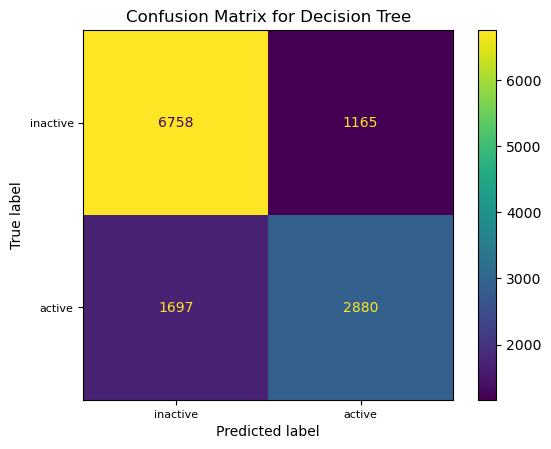

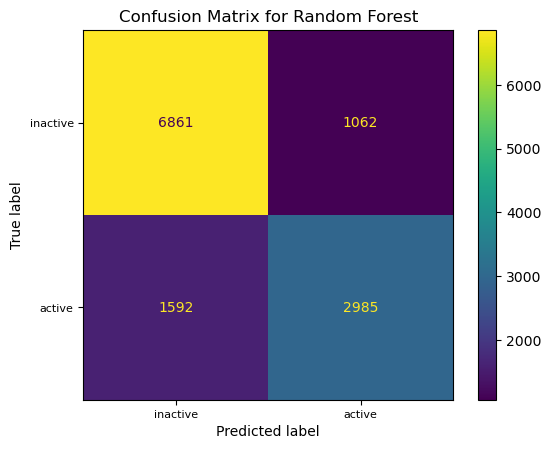

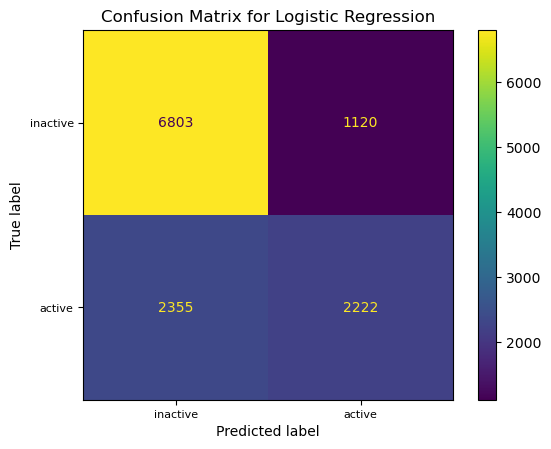

,Model Name,Accuracy,F1,Precision,Recall,Model,Parameters
0,Decision Tree,0.77104,0.668058,0.629233,0.711990,"DecisionTreeClassifier(max_depth=10, max_featu...","{'ccp_alpha': 0.0, 'class_weight': None, 'crit..."
1,Random Forest,0.78768,0.692254,0.652174,0.737583,"(DecisionTreeClassifier(criterion='entropy', m...","{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w..."
2,Logistic Regression,0.72200,0.561182,0.485471,0.664871,"(SimpleImputer(strategy='median'), StandardSca...","{'memory': None, 'steps': [('simpleimputer', S..."


In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

results =[]
best_models = [tree_best, rf_best, lr_best]
for name, model in zip(names, best_models):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, pos_label=True)
    precision = precision_score(y_pred, y_test, pos_label=True)
    recall = recall_score(y_pred, y_test, pos_label=True)
    params = model.get_params()
    row = (name, accuracy, f1, precision, recall, model, params)
    results.append(row)
    
    cm = confusion_matrix(y_test, y_pred, labels = model.classes_)
    fig, ax = plt.subplots()
    display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                        display_labels = ['inactive', 'active'])
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(labels = ['inactive', 'active'], fontsize = 8)
    ax.set_yticklabels(labels = ['inactive', 'active'], fontsize = 8)
    display_cm.plot(ax = ax)
    plt.title(f'Confusion Matrix for {name}')
    plt.show()

columns = ['Model Name','Accuracy','F1','Precision','Recall', 'Model', 'Parameters']
results_df = pd.DataFrame(results, columns=columns)
results_df.head()

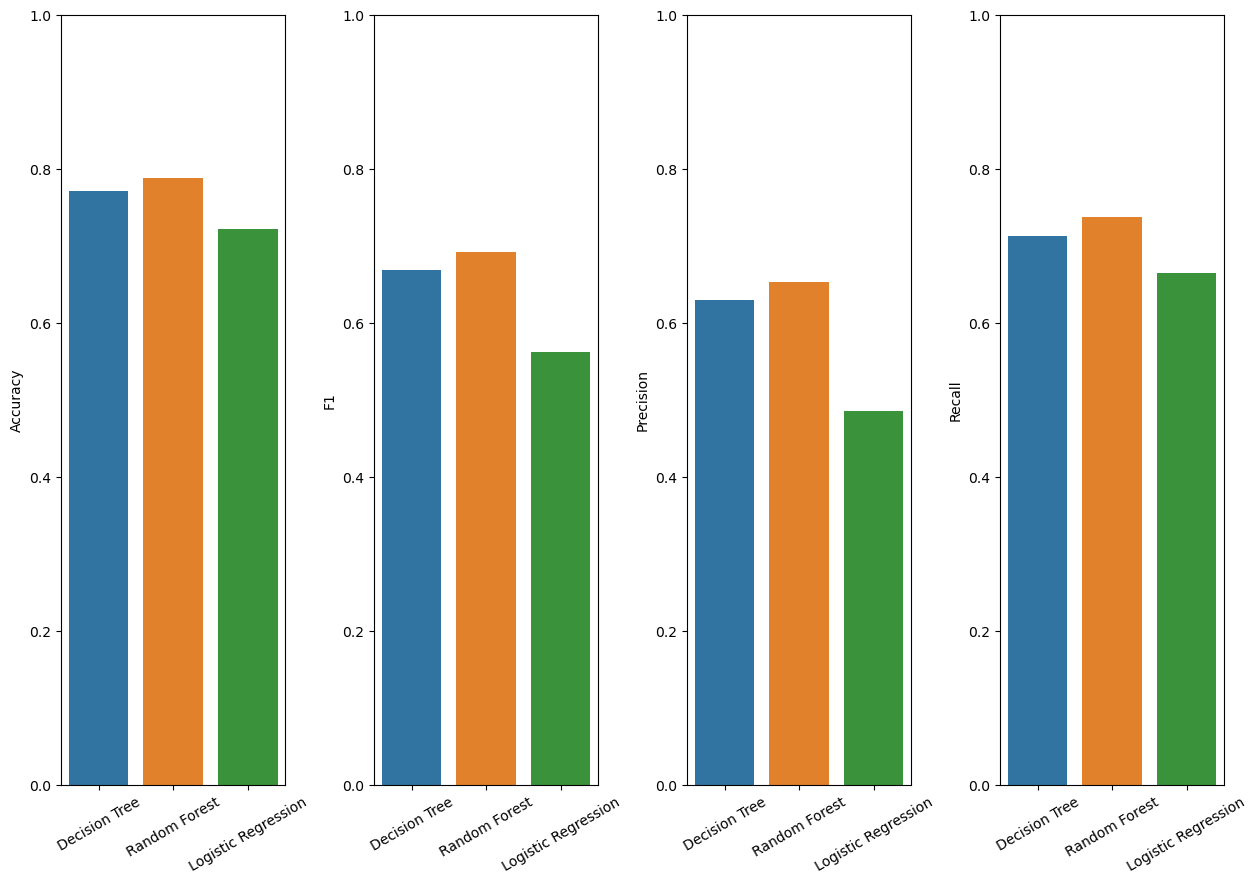

In [39]:
fig, axes = plt.subplots(1,4, figsize=(15,10))
scores = results_df.columns.to_list()[1:5]
for score, ax in zip(['Accuracy', 'F1', 'Precision', 'Recall'], axes.flat):
    g = sns.barplot(ax=ax, data=results_df, y=score, x='Model Name')
    ax.tick_params(axis='x', rotation=30)
    ax.set_xlabel(None)
    ax.set_ylim(0,1);
plt.subplots_adjust(wspace=0.4)

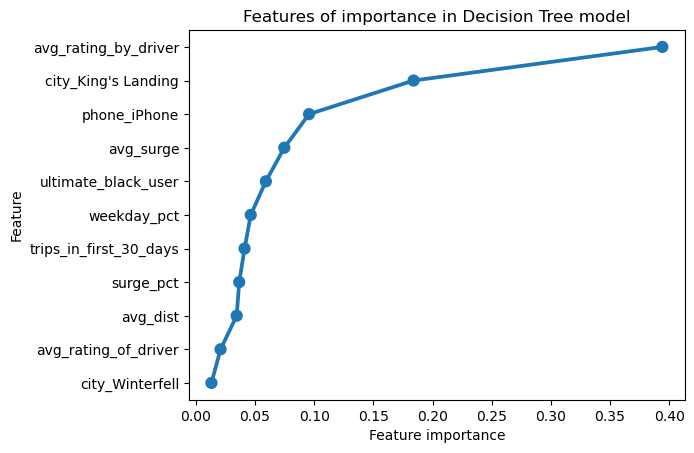

Feature 1: avg_rating_by_driver
    Importance: 0.3942188769567909
Feature 2: city_King's Landing
    Importance: 0.1839608139497191
Feature 3: phone_iPhone
    Importance: 0.09561692251651802
Feature 4: avg_surge
    Importance: 0.07468976997158844
Feature 5: ultimate_black_user
    Importance: 0.059109171079880785
Feature 6: weekday_pct
    Importance: 0.04632287165722047
Feature 7: trips_in_first_30_days
    Importance: 0.041119000462449984
Feature 8: surge_pct
    Importance: 0.03658996488125591
Feature 9: avg_dist
    Importance: 0.03444001707504324
Feature 10: avg_rating_of_driver
    Importance: 0.020809119964069273
Feature 11: city_Winterfell
    Importance: 0.013123471485463934


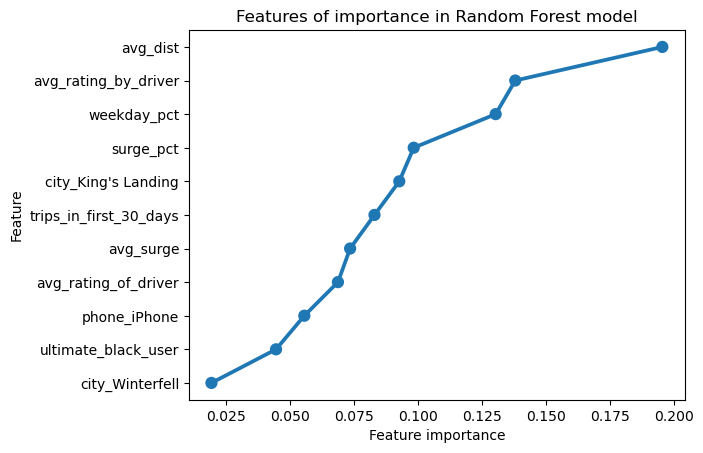

Feature 1: avg_dist
    Importance: 0.19555203337321955
Feature 2: avg_rating_by_driver
    Importance: 0.1380689833898224
Feature 3: weekday_pct
    Importance: 0.13040587075539267
Feature 4: surge_pct
    Importance: 0.0983821700537141
Feature 5: city_King's Landing
    Importance: 0.09273491754499356
Feature 6: trips_in_first_30_days
    Importance: 0.08304876418973325
Feature 7: avg_surge
    Importance: 0.07352001326092326
Feature 8: avg_rating_of_driver
    Importance: 0.06876473197716984
Feature 9: phone_iPhone
    Importance: 0.055628766769767767
Feature 10: ultimate_black_user
    Importance: 0.044566579984528426
Feature 11: city_Winterfell
    Importance: 0.019327168700735173


In [40]:
for i in range(2):
    model_name = results_df.iloc[i,0]
    model = results_df.iloc[i,5]
    feature = model.feature_names_in_
    df = pd.DataFrame({'feature': model.feature_names_in_,
                      'feature_importance': model.feature_importances_})
    df.sort_values('feature_importance', ascending=False, inplace=True)

    sns.pointplot(data=df, y='feature', x='feature_importance')
    plt.title(f'Features of importance in {model_name} model')
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    plt.show()

    for i in range(len(df)):
        feature = df.iloc[i,0]
        importance = df.iloc[i,1]
        print(f'Feature {i+1}: {feature}')
        print(f'    Importance: {importance}')